Total records: 1226

Monthly Active Users (MAU):
Year-Month   Active Users    Total Posts 
--------------------------------------------------
2022-06      2               2           
2022-07      15              17          
2022-08      4               4           
2022-09      1               1           
2022-10      3               3           
2022-11      5               5           
2022-12      1               1           
2023-01      13              15          
2023-02      6               6           
2023-03      4               4           
2023-04      10              10          
2023-05      7               7           
2023-06      9               9           
2023-07      2               2           
2023-08      14              14          
2023-09      31              32          
2023-10      30              33          
2023-11      34              39          
2023-12      29              29          
2024-01      48              53          
2024-02      54   

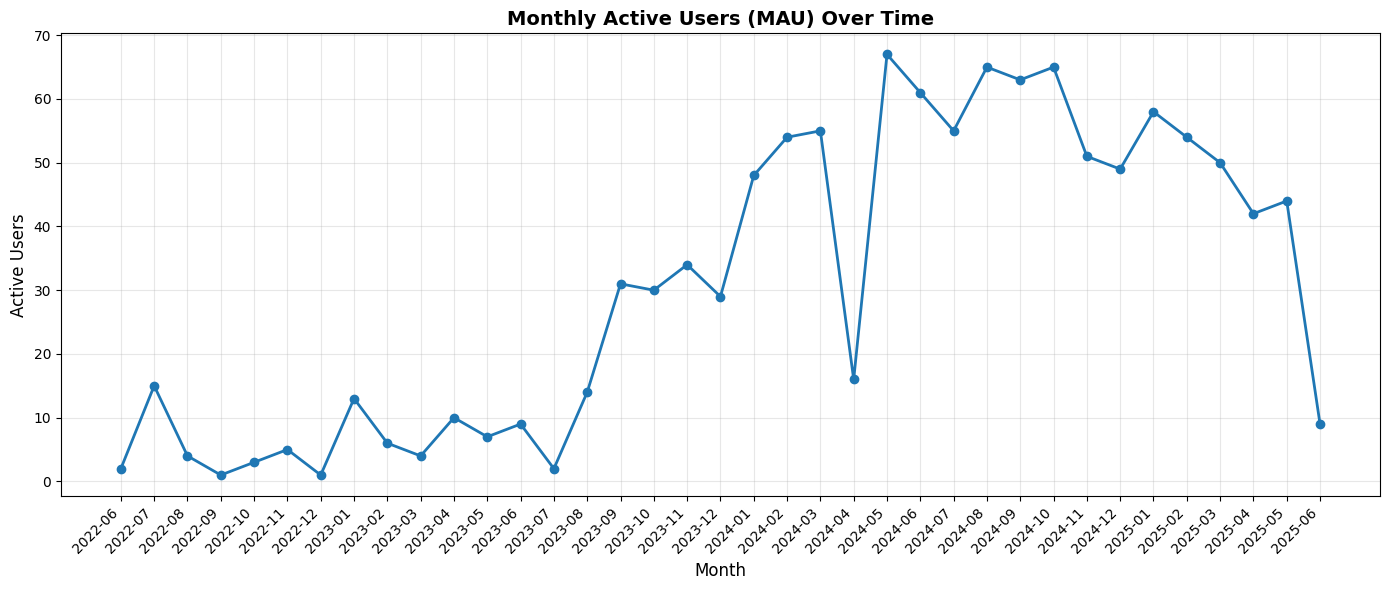

In [6]:
import pandas as pd
import numpy as np
from datetime import datetime

# Read the Excel file
df = pd.read_excel('data.xlsx', sheet_name='aat_first_topic')

print(f"Total records: {len(df)}")

# Convert created_at to datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Extract year-month
df['year'] = df['created_at'].dt.year

df['year_month'] = df['created_at'].dt.to_period('M')

# Calculate Monthly Active Users (MAU)
mau_data = df.groupby('year_month').agg(
    active_users=('user_id', 'nunique'),
    total_posts=('user_id', 'count')
).reset_index()

# Convert period to string for display
mau_data['year_month'] = mau_data['year_month'].astype(str)

# Display results
print("\nMonthly Active Users (MAU):")
print("="*50)
print(f"{'Year-Month':<12} {'Active Users':<15} {'Total Posts':<12}")
print("-"*50)
for _, row in mau_data.iterrows():
    print(f"{row['year_month']:<12} {row['active_users']:<15} {row['total_posts']:<12}")

# Calculate summary statistics
total_unique_users = df['user_id'].nunique()
avg_mau = mau_data['active_users'].mean()
max_mau_row = mau_data.loc[mau_data['active_users'].idxmax()]
min_mau_row = mau_data.loc[mau_data['active_users'].idxmin()]

print("\n" + "="*50)
print("SUMMARY STATISTICS")
print("="*50)
print(f"Total Unique Users (All Time): {total_unique_users}")
print(f"Average MAU: {avg_mau:.1f}")
print(f"Highest MAU: {max_mau_row['active_users']} in {max_mau_row['year_month']}")
print(f"Lowest MAU: {min_mau_row['active_users']} in {min_mau_row['year_month']}")
print(f"Date Range: {mau_data['year_month'].iloc[0]} to {mau_data['year_month'].iloc[-1]}")

# Optional: Save to CSV
mau_data.to_csv('monthly_active_users.csv', index=False)
print("\nResults saved to 'monthly_active_users.csv'")

# Optional: Create a simple visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(range(len(mau_data)), mau_data['active_users'], marker='o', linewidth=2, markersize=6)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Active Users', fontsize=12)
plt.title('Monthly Active Users (MAU) Over Time', fontsize=14, fontweight='bold')
plt.xticks(range(len(mau_data)), mau_data['year_month'], rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('mau_trend.png', dpi=300, bbox_inches='tight')
print("Visualization saved to 'mau_trend.png'")
plt.show()

In [11]:
mau_data['year'] = mau_data['year_month'].str[:4].astype(int)

# Filter for 2024
mau_2024 = mau_data[mau_data['year'] == 2024]
avg_mau_2024 = mau_2024['active_users'].mean()

# Filter for 2025 (excluding incomplete June)
mau_2025_all = mau_data[mau_data['year'] == 2025]
mau_2025_full = mau_2025_all[mau_2025_all['year_month'] != '2025-06']
avg_mau_2025_full = mau_2025_full['active_users'].mean()
avg_mau_2025_all = mau_2025_all['active_users'].mean()

# Display 2024 results
print("="*60)
print("2024 MONTHLY ACTIVE USERS")
print("="*60)
print(f"{'Month':<15} {'Active Users':<15} {'Total Posts':<15}")
print("-"*60)
for _, row in mau_2024.iterrows():
    print(f"{row['year_month']:<15} {row['active_users']:<15} {row['total_posts']:<15}")
print("-"*60)
print(f"2024 Average MAU: {avg_mau_2024:.1f} users")
print(f"Total months in 2024: {len(mau_2024)}")

# Display 2025 results
print("\n" + "="*60)
print("2025 MONTHLY ACTIVE USERS")
print("="*60)
print(f"{'Month':<15} {'Active Users':<15} {'Total Posts':<15}")
print("-"*60)
for _, row in mau_2025_all.iterrows():
    incomplete = " (incomplete)" if row['year_month'] == '2025-06' else ""
    print(f"{row['year_month']:<15} {row['active_users']:<15} {row['total_posts']:<15}{incomplete}")
print("-"*60)
print(f"2025 Average MAU (Jan-May, excluding incomplete June): {avg_mau_2025_full:.1f} users")
print(f"2025 Average MAU (including incomplete June): {avg_mau_2025_all:.1f} users")
print(f"Total complete months in 2025: {len(mau_2025_full)}")

2024 MONTHLY ACTIVE USERS
Month           Active Users    Total Posts    
------------------------------------------------------------
2024-01         48              53             
2024-02         54              60             
2024-03         55              61             
2024-04         16              16             
2024-05         67              73             
2024-06         61              68             
2024-07         55              60             
2024-08         65              76             
2024-09         63              69             
2024-10         65              72             
2024-11         51              54             
2024-12         49              52             
------------------------------------------------------------
2024 Average MAU: 54.1 users
Total months in 2024: 12

2025 MONTHLY ACTIVE USERS
Month           Active Users    Total Posts    
------------------------------------------------------------
2025-01         58              65    

In [14]:
# Convert created_at to datetime and extract year
df['created_at'] = pd.to_datetime(df['created_at'])
df['year'] = df['created_at'].dt.year

# Calculate engagement score (likes + replies)
df['engagement_score'] = df['like_count'].fillna(0) + df['reply_count'].fillna(0)

# Filter for 2024 and 2025
df_2024 = df[df['year'] == 2024]
df_2025 = df[df['year'] == 2025]

# Calculate standard deviation
std_2024 = df_2024['engagement_score'].std()
std_2025 = df_2025['engagement_score'].std()

# Display results
print("="*50)
print("ENGAGEMENT SCORE STANDARD DEVIATION")
print("="*50)
print(f"2024 Standard Deviation: {std_2024:.2f}")
print(f"2025 Standard Deviation: {std_2025:.2f}")
print("="*50)

ENGAGEMENT SCORE STANDARD DEVIATION
2024 Standard Deviation: 5.76
2025 Standard Deviation: 7.03
